In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data = pd.read_csv("mymoviedb.csv", lineterminator = '\n')

In [142]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [144]:
data.shape

(9827, 9)

In [145]:
data['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [146]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [147]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [148]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

print(data["Release_Date"].dtypes)

datetime64[ns]


In [149]:
data["Release_Date"] = data["Release_Date"].dt.year

data["Release_Date"].dtypes
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [150]:
data.drop(['Overview', 'Original_Language', 'Poster_Url'], axis = 1, inplace = True)

In [151]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [152]:
data.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [153]:
def Catigorize_colmn(data, col, labels):
    edges = [data[col].describe()['min'],
             data[col].describe()['25%'],
             data[col].describe()['50%'],
             data[col].describe()['75%'],
             data[col].describe()['max']]
    data[col] = pd.cut(data[col], edges, labels =labels, duplicates = 'drop')
    return data

In [154]:
labels = ['not_popular', 'below_average', 'average', 'popular']

Catigorize_colmn(data, 'Vote_Average', labels)

data['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [155]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [156]:
data['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [157]:
data.dropna(inplace = True)

data.isna()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9822,False,False,False,False,False,False
9823,False,False,False,False,False,False
9824,False,False,False,False,False,False
9825,False,False,False,False,False,False


In [158]:
data.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [159]:
data['Genre'] = data['Genre'].str.split(', ')

data = data.explode('Genre').reset_index(drop=True)
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [160]:
data['Genre'] = data['Genre'].astype('category')

data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [161]:
data.shape

(25552, 6)

In [162]:
data['Genre'].unique()

['Action', 'Adventure', 'Science Fiction', 'Crime', 'Mystery', ..., 'Romance', 'Western', 'History', 'TV Movie', 'Documentary']
Length: 19
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']

In [163]:
data.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# We hava mostly done the Pre-Processing so Now we are going to move towards the visualization 

In [164]:
#sns.set_style('whitegrid')

In [165]:
data['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

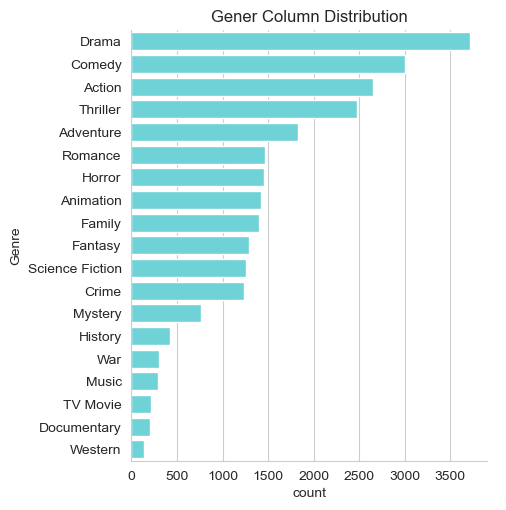

In [166]:
sns.catplot(y = 'Genre', data = data, kind = 'count',
            order = data['Genre'].value_counts().index,
            color = '#5DE2E7')
plt.title('Gener Column Distribution')
plt.show()

In [167]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


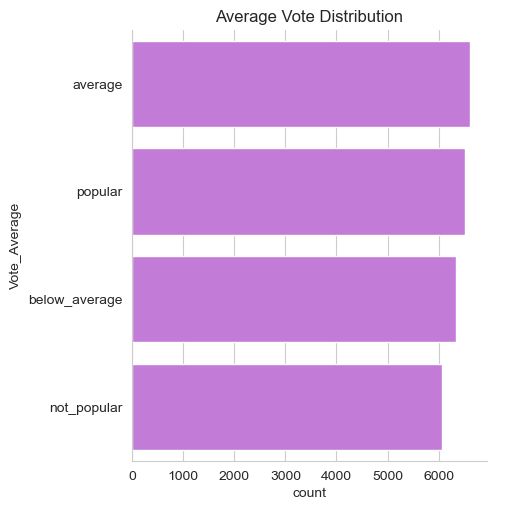

In [169]:
sns.catplot(y = 'Vote_Average', data = data, kind = 'count',
            order = data['Vote_Average'].value_counts().index,
            color = '#CC6CE7')
plt.title('Average Vote Distribution')
plt.show()

data.head(3)

#What movie get the maximum popularity and whats its genre

In [172]:
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#What movie get the lowest popularity and whats its genre

In [173]:
data[data['Popularity'] == data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# which year has the most filmed movies?

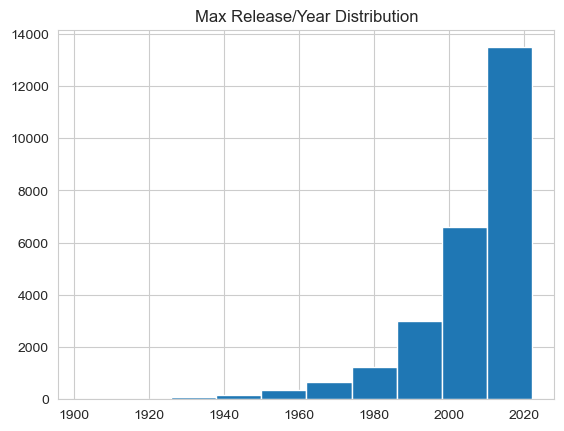

In [180]:
data['Release_Date'].hist()
plt.title("Max Release/Year Distribution")
plt.show()